## Exercise 2: Bias-variance trade-off and resampling techniques 

#### Overview of nature of the problem: n



In [1]:

import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from common import *
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [8]:


np.random.seed(SEED_VALUE)
maxdegree = 15
n_bootstraps = 40
n = 20
x = np.sort(np.random.uniform(0, 1, n))
y = np.sort(np.random.uniform(0, 1, n))
x,y = np.meshgrid(x,y)
z = FrankeFunction(x,y) + noise_factor(n, factor=0.1)

Testing bootstrap function

Looping trhough polynomials up to 15 with 40: 100%|██████████| 15/15 [00:00<00:00, 20.93it/s]


Elapsed time 718.2159ms in function bootstrap


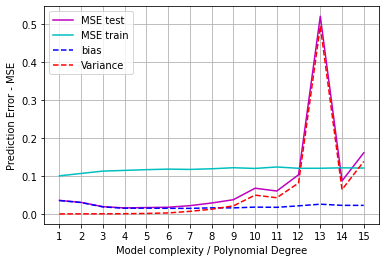

In [9]:
polydegree = np.arange(1, maxdegree+1)
MSE_test, MSE_train, bias, variance = bootstrap(x, y, z, maxdegree, n_bootstraps, OLS())

plt.plot(polydegree, MSE_test,"m", label='MSE test')
plt.plot(polydegree, MSE_train,"c", label='MSE train')
plt.plot(polydegree, bias,"b--", label='bias')
plt.plot(polydegree, variance,"r--", label='Variance')
#plt.plot(polydegree, bias+variance,"g--", label='bias+variance')

plt.xlabel("Model complexity / Polynomial Degree")
plt.ylabel("Prediction Error - MSE")
plt.xticks(polydegree)
plt.grid(True)
plt.legend()
plt.savefig(f"{REPORT_FIGURES}{EX2}model_complexity_using_bootstrap_function.pdf")
plt.show()

In [4]:
MSE_test = np.zeros(maxdegree)
MSE_train = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
std = np.zeros(maxdegree)
z_flat = z.ravel().reshape(-1,1)

Looping through polynomials up to 15 degrees with 40 bootstraps: 100%|██████████| 15/15 [00:00<00:00, 25.52it/s]


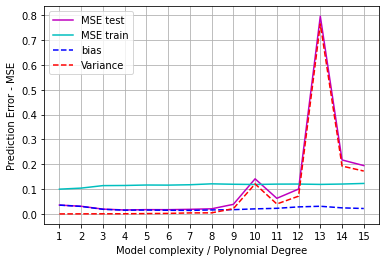

In [5]:
polydegree = np.arange(1, maxdegree+1)
for degree in tqdm(range(1, maxdegree+1), desc = f"Looping through polynomials up to {maxdegree} degrees with {n_bootstraps} bootstraps: "):
    X = create_X(x, y, n=degree)

    # Train test split
    X_train, X_test, z_train, z_test = prepare_data(X, z_flat, test_size=0.2, shuffle=True, scale_X=True, random_state=SEED_VALUE)
    X_train[:,0] = 1
    X_test[:,0] = 1
    model = OLS()
    z_hat_trains, z_hat_tests = bootstrapping(X_train, z_train, X_test, z_test, n_bootstraps, model, keep_intercept=True)

    MSE_test[degree-1] = np.mean( np.mean((z_test - z_hat_tests)**2, axis=1, keepdims=True ))
    MSE_train[degree-1] = np.mean( np.mean((z_train - z_hat_trains)**2, axis=1, keepdims=True ))
    bias[degree-1] = np.mean( (z_test - np.mean(z_hat_tests, axis=1, keepdims=True))**2 )
    variance[degree-1] = np.mean( np.var(z_hat_tests, axis=1, keepdims=True))
    std[degree-1] = np.mean( np.std(z_hat_tests, axis=1, keepdims=True))

plt.plot(polydegree, MSE_test,"m", label='MSE test')
plt.plot(polydegree, MSE_train,"c", label='MSE train')
plt.plot(polydegree, bias,"b--", label='bias')
plt.plot(polydegree, variance,"r--", label='Variance')
#plt.plot(polydegree, bias+variance,"g--", label='bias+variance')

plt.xlabel("Model complexity / Polynomial Degree")
plt.ylabel("Prediction Error - MSE")
plt.xticks(polydegree)
plt.grid(True)
plt.legend()
plt.savefig(f"{REPORT_FIGURES}{EX2}model_complexity_using_bootstrap.pdf")
plt.show()

,polynomial_deg,MSE_test,MSE_std
0,1,0.035892,0.015189
1,2,0.031025,0.021602
2,3,0.019589,0.024173
3,4,0.016125,0.025589
4,5,0.017484,0.033778
5,6,0.017290,0.035973
6,7,0.018750,0.045626
7,8,0.020832,0.050066
8,9,0.038728,0.074657
9,10,0.141595,0.127821


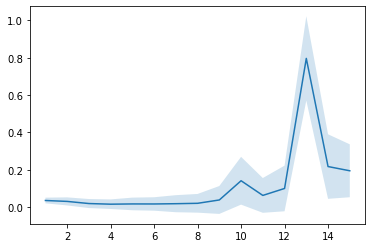

In [6]:
df = pd.DataFrame()
df["polynomial_deg"] = polydegree
df["MSE_test"] = MSE_test
df["MSE_std"] = std
display(df)
df.to_csv(f"{REPORT_DATA}{EX2}bootstrap_test_MSE.csv")


plt.figure()
plt.plot(range(1, maxdegree+1), MSE_test)
plt.fill_between(range(1, maxdegree+1), MSE_test-std, MSE_test+std, alpha=0.2)

plt.show()

# Studying bias-variance tradeoff as dependance on the number of datpoints
The following section will create datasets with an increasing number of datapoints. The purpouse of this analysis is to study how the bias-variance tradeoff for Ordinary Least squares varies as a function of the number of datapoints. This is an addendum to the previous analysis where we studied the bias-variance tradeoff as a function of the model complexity. 